In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/covid19_tn (1).csv')
df.head()

,Date,State,Confirmed,Daily,Recovered,Deceased,Other,Tested
0,01-01-21,Tamil Nadu,818935,921,798420,12135,0,14258645
1,02-01-21,Tamil Nadu,819845,910,799427,12146,0,14321046
2,03-01-21,Tamil Nadu,820712,867,800429,12156,0,14382123
3,04-01-21,Tamil Nadu,821550,838,801414,12166,0,14442625
4,05-01-21,Tamil Nadu,822370,820,802385,12177,0,14502929


In [ ]:
df1=df.loc[:,['Date','Daily']]
df1.head(30)

,Date,Daily
0,01-01-21,921
1,02-01-21,910
2,03-01-21,867
3,04-01-21,838
4,05-01-21,820
5,06-01-21,811
6,07-01-21,805
7,08-01-21,790
8,09-01-21,761
9,10-01-21,724


In [ ]:
df1['Date']=pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    146 non-null    datetime64[ns]
 1   Daily   146 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
#df1.set_index('Date',inplace=True)

In [ ]:
df1.columns = ['ds','y']
df1.head()

,ds,y
0,2021-01-01,921
1,2021-02-01,910
2,2021-03-01,867
3,2021-04-01,838
4,2021-05-01,820


In [ ]:
df1

,ds,y
0,2021-01-01,921
1,2021-02-01,910
2,2021-03-01,867
3,2021-04-01,838
4,2021-05-01,820
...,...,...
141,2021-05-22,35873
142,2021-05-23,35483
143,2021-05-24,34867
144,2021-05-25,34285


In [ ]:
from fbprophet import Prophet
# Initialize the Model
model=Prophet( daily_seasonality=True)

In [ ]:
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future_dates=model.make_future_dataframe(periods=10,freq="D")


In [ ]:
prediction=model.predict(future_dates)


In [ ]:

prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,1006.725653,-11000.291030,15688.418446,1006.725653,1006.725653,1352.020889,1352.020889,1352.020889,345.888744,345.888744,345.888744,1006.132144,1006.132144,1006.132144,0.0,0.0,0.0,2358.746542
1,2021-01-02,1074.548333,-13253.105190,12959.265012,1074.548333,1074.548333,-573.122855,-573.122855,-573.122855,345.888744,345.888744,345.888744,-919.011599,-919.011599,-919.011599,0.0,0.0,0.0,501.425478
2,2021-01-03,1142.371013,-11311.978208,15067.025419,1142.371013,1142.371013,811.318833,811.318833,811.318833,345.888744,345.888744,345.888744,465.430089,465.430089,465.430089,0.0,0.0,0.0,1953.689846
3,2021-01-04,1210.193692,-11084.876482,15135.011868,1210.193692,1210.193692,914.876907,914.876907,914.876907,345.888744,345.888744,345.888744,568.988162,568.988162,568.988162,0.0,0.0,0.0,2125.070599
4,2021-01-05,1278.016372,-10652.674925,15292.459523,1278.016372,1278.016372,964.860076,964.860076,964.860076,345.888744,345.888744,345.888744,618.971331,618.971331,618.971331,0.0,0.0,0.0,2242.876448


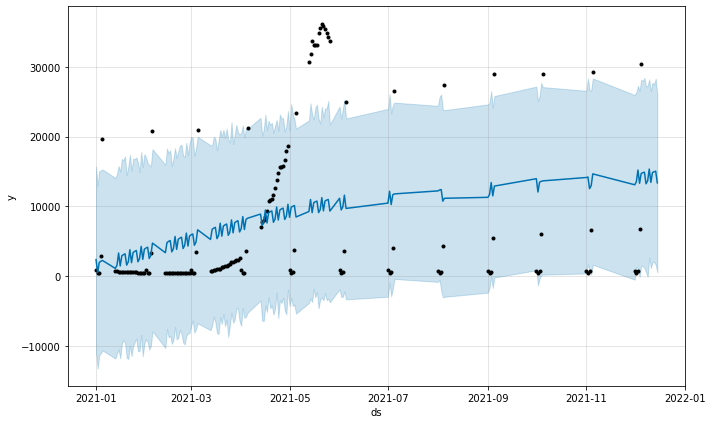

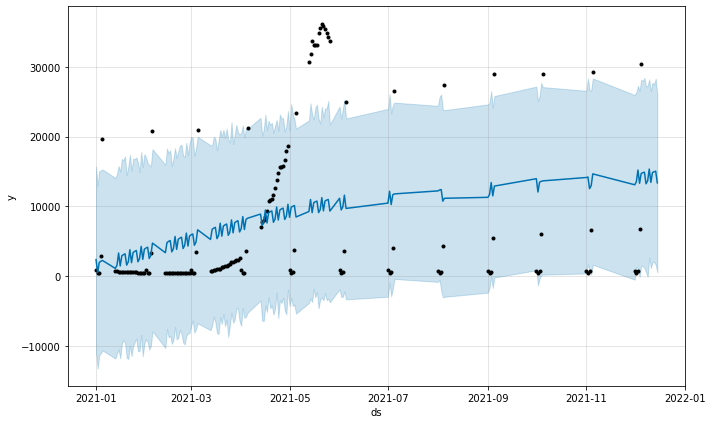

In [ ]:
p1=prediction[['ds','yhat','yhat_lower','yhat_upper']]
### plot the predicted projection
model.plot(p1)